In [91]:
import sqlite3
import json
import csv
import pandas as pd
import numpy as np
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
df = pd.read_json('/Users/Krishna Bharadwaj/Desktop/Clothing_Shoes_and_Jewelry_5.json',lines=True)
df.to_csv('A1.csv', sep=',', index=False)

In [92]:
print(df.columns)
print(df.shape)

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')
(278677, 9)


In [93]:
count = df.groupby("asin", as_index=False).count()
mean = df.groupby("asin", as_index=False).mean()
dfMerged = pd.merge(df, count, how='right', on=['asin'])
dfMerged

,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,helpful_y,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y
0,0000031887,"[0, 0]",5,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800,23,23,23,23,23,23,23,23
1,0000031887,"[0, 0]",5,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600,23,23,23,23,23,23,23,23
2,0000031887,"[0, 0]",5,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600,23,23,23,23,23,23,23,23
3,0000031887,"[0, 0]",5,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800,23,23,23,23,23,23,23,23
4,0000031887,"[0, 0]",5,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600,23,23,23,23,23,23,23,23
5,0000031887,"[0, 0]",4,I received this today and I'm not a fan of it ...,"03 31, 2014",A27UF1MSF3DB2,"C-Lo ""Cynthia""",It's ok,1396224000,23,23,23,23,23,23,23,23
6,0000031887,"[0, 0]",5,Bought this as a backup to the regular ballet ...,"05 3, 2014",A16GFPNVF4Y816,design maven,Great for dress-up and for ballet practice,1399075200,23,23,23,23,23,23,23,23
7,0000031887,"[0, 0]",5,Great tutu for a great price. It isn't a &#34;...,"12 23, 2012",A2M2APVYIB2U6K,Jamie P.,Great value,1356220800,23,23,23,23,23,23,23,23
8,0000031887,"[0, 0]",4,"My daughter liked this, and it with her costum...","11 10, 2013",A1NJ71X3YPQNQ9,JBerger,Good,1384041600,23,23,23,23,23,23,23,23
9,0000031887,"[7, 8]",5,For what I paid for two tutus is unbeatable an...,"10 7, 2012",A3EERSWHAI6SO,"Jeffrey Hollingshead ""Jillian hollingshead""",WOW !! ..is all I have to say!,1349568000,23,23,23,23,23,23,23,23


In [141]:
#rename column
dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]
dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]
dfNew

,asin,summaryReview,overallScore,totalReviewers
161700,B005LERHD8,It's ok,4,441
161269,B005LERHD8,Really Cute,4,441
161280,B005LERHD8,Very pretty,4,441
161279,B005LERHD8,Not worth your money,1,441
161278,B005LERHD8,Really pretty!,5,441
161277,B005LERHD8,Cute,4,441
161276,B005LERHD8,nice except the eyes are a little creepy,4,441
161275,B005LERHD8,nice quality. Nice length,5,441
161274,B005LERHD8,"Very cute, larger than it appears",4,441
161273,B005LERHD8,Cheap,1,441


In [95]:
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 100]
dfCount

,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,helpful_y,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y,totalReviewers,overallScore,summaryReview
161700,B005LERHD8,"[0, 0]",4,I was expecting it to be more of a gold tint w...,"01 10, 2013",A205ZO9KZY2ZD2,Winnie,It's ok,1357776000,441,441,441,441,441,441,441,441,441,4,It's ok
161269,B005LERHD8,"[0, 0]",4,The owl necklace is really cute but made real ...,"07 23, 2012",A1HFSY6W8LJNJM,"Alicia7tommy ""Alicia Andrews""",Really Cute,1343001600,441,441,441,441,441,441,441,441,441,4,Really Cute
161280,B005LERHD8,"[0, 0]",4,Very pretty. A lot bigger than I expected. I...,"01 11, 2013",A23L30BKF59BO4,Amazon Customer,Very pretty,1357862400,441,441,441,441,441,441,441,441,441,4,Very pretty
161279,B005LERHD8,"[0, 0]",1,I order xmcheap jewelry on amazon all the tone...,"02 25, 2014",A1B1YH4TZ326SX,Amazon Customer,Not worth your money,1393286400,441,441,441,441,441,441,441,441,441,1,Not worth your money
161278,B005LERHD8,"[0, 0]",5,I am using it as an acessorie on my first day ...,"08 15, 2013",A2AEFSWJCJ8Q6P,Amazon Customer,Really pretty!,1376524800,441,441,441,441,441,441,441,441,441,5,Really pretty!
161277,B005LERHD8,"[0, 0]",4,Husband got this for me and it's really cute. ...,"05 9, 2014",A1WPO8LZHY3YN2,Amazon Customer,Cute,1399593600,441,441,441,441,441,441,441,441,441,4,Cute
161276,B005LERHD8,"[0, 0]",4,"i don't know why, it is prob the size, but i a...","05 21, 2013",A3F5FQ15IE0PDG,A.Mary,nice except the eyes are a little creepy,1369094400,441,441,441,441,441,441,441,441,441,4,nice except the eyes are a little creepy
161275,B005LERHD8,"[0, 0]",5,"Cute, nice quality. Nice length.","07 8, 2014",A3HICO8WGUNJGM,Amanda W.,nice quality. Nice length,1404777600,441,441,441,441,441,441,441,441,441,5,nice quality. Nice length
161274,B005LERHD8,"[0, 0]",4,This is a really cute piece of jewelery. The c...,"01 27, 2014",A11FNXJY7K666M,Amanda Starcher,"Very cute, larger than it appears",1390780800,441,441,441,441,441,441,441,441,441,4,"Very cute, larger than it appears"
161273,B005LERHD8,"[0, 0]",1,"So cheap! Bought it for myself, gave it to my ...","01 7, 2014",A2R42GD26S01S0,Amanda Simcoe,Cheap,1389052800,441,441,441,441,441,441,441,441,441,1,Cheap


In [96]:
dfProductReview = df.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")

In [97]:
dfProductReview

,asin,overall,unixReviewTime
0,0000031887,4.608696,1.370064e+09
1,0123456479,4.166667,1.382947e+09
2,1608299953,4.307692,1.307637e+09
3,1617160377,4.625000,1.321078e+09
4,B00001W0KA,4.625000,1.349492e+09
5,B00001WRHJ,3.500000,1.353586e+09
6,B00004SR8W,4.666667,1.346782e+09
7,B00004SR8Z,4.545455,1.363828e+09
8,B00004SR9P,4.000000,1.340091e+09
9,B00004U1J2,3.923077,1.370537e+09


In [98]:

df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')

In [99]:
df3 = df3[['asin','summaryReview','overall']]

In [100]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

In [101]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

In [102]:
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = pd.DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [103]:
dfReviews.to_csv("dfReviews.csv")
dfReviews

,absolutely,adorable,allegra,amazing,amazon,arch,attractive,awesome,backpack,bad,...,wonderful,work,workout,works,worn,worth,wow,wrong,yes,yoga
0,0,0,0,0,1,0,0,0,0,1,...,1,2,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,2,0,1,...,1,0,0,0,1,0,0,2,0,0
3,0,0,0,1,1,0,0,6,0,0,...,0,0,0,1,0,3,3,2,0,0
4,0,0,0,0,1,0,0,3,0,1,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,2,25,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,3,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
8,0,0,0,0,1,0,0,0,0,2,...,0,2,0,0,0,1,0,1,1,0
9,1,0,0,0,0,0,0,2,0,0,...,1,0,0,0,0,1,0,0,0,0


In [104]:
X = np.array(dfReviews)
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [105]:
# KNN 
print(lentrain)
print(lentest)

80
9


In [161]:
from sklearn.neighbors import NearestNeighbors
neighbor = NearestNeighbors(n_neighbors=3, algorithm='kd_tree').fit(dfReviews_train)
distances, indices = neighbor.kneighbors(dfReviews_train)

In [162]:
#for just 1
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B008RUOCJU  average rating is  3.973684210526316
The first similar product is  B007WAEBPQ  average rating is  4.333333333333333
The second similar product is  B004R1II48  average rating is  4.055555555555555
-----------------------------------------------------------
Based on product reviews, for  B008WYDP1C  average rating is  4.257028112449799
The first similar product is  B007WA3K4Y  average rating is  4.209424083769633
The second similar product is  B0083S18LQ  average rating is  3.9565217391304346
-----------------------------------------------------------
Based on product reviews, for  B008X0EW44  average rating is  3.874125874125874
The first similar product is  B007WAEBPQ  average rating is  4.333333333333333
The second similar product is  B0083S18LQ  average rating is  3.9565217391304346
-----------------------------------------------------------
Based on product reviews, for  B009DNWFD0  average rating is  3.8446601941747574
The first similar pr

In [163]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)
print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       0.57      1.00      0.73         8

avg / total       0.33      0.57      0.42        14



C:\Users\Krishna Bharadwaj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [164]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.5714285714285714


In [165]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.42857142857142855


In [166]:
cluster = df.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["summaryClean"] = cluster1["summary"].apply(cleanReviews)

In [167]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Krishna
[nltk_data]     Bharadwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [168]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

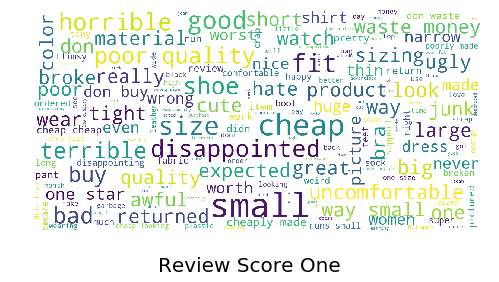

In [169]:
show_wordcloud(cluster1["summaryClean"][0], title = "Review Score One")

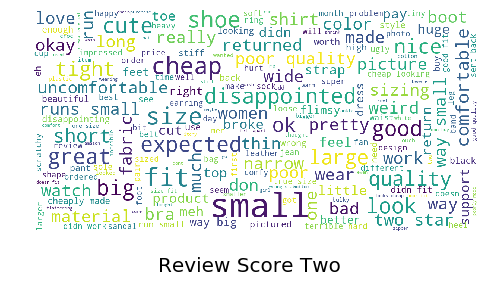

In [170]:
show_wordcloud(cluster1["summaryClean"][1] , title = "Review Score Two")

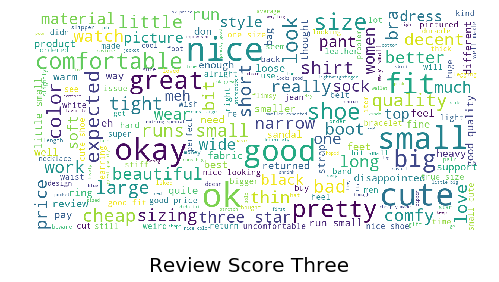

In [171]:
show_wordcloud(cluster1["summaryClean"][2], title = "Review Score Three")

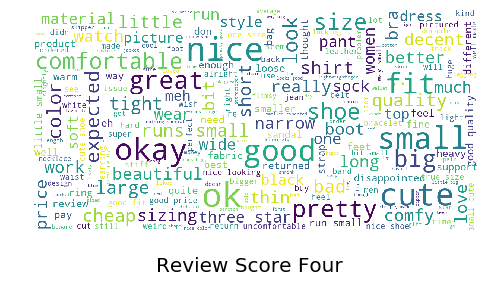

In [172]:
show_wordcloud(cluster1["summaryClean"][2], title = "Review Score Four")

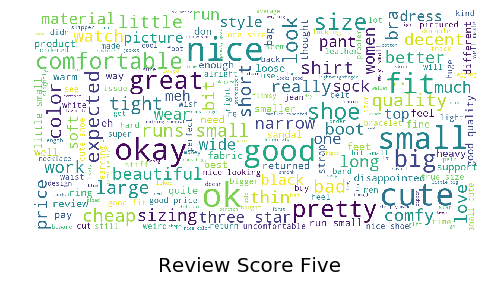

In [173]:
show_wordcloud(cluster1["summaryClean"][2], title = "Review Score Five")